<a href="https://colab.research.google.com/github/chadunduraa/digit-recognition/blob/main/digit%20recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/20
1500/1500 [==============================] - 21s 12ms/step - loss: 0.3967 - accuracy: 0.8804 - val_loss: 0.1589 - val_accuracy: 0.9535
Epoch 2/20
  13/1500 [..............................] - ETA: 12s - loss: 0.2322 - accuracy: 0.9183

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 16s 10ms/step - loss: 0.1934 - accuracy: 0.9411 - val_loss: 0.1153 - val_accuracy: 0.9662
Epoch 3/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1540 - accuracy: 0.9538 - val_loss: 0.1048 - val_accuracy: 0.9701
Epoch 4/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.1338 - accuracy: 0.9599 - val_loss: 0.0970 - val_accuracy: 0.9719
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1207 - accuracy: 0.9630 - val_loss: 0.0892 - val_accuracy: 0.9737
Epoch 6/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.1067 - accuracy: 0.9674 - val_loss: 0.0910 - val_accuracy: 0.9745
Epoch 7/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0978 - accuracy: 0.9704 - val_loss: 0.0818 - val_accuracy: 0.9753
Epoch 8/20
1500/1500 [==============================] - 10s 7ms/step - loss: 0.0911 - accuracy: 0.9720 - val_loss: 0.0833 - val_accuracy: 0.97

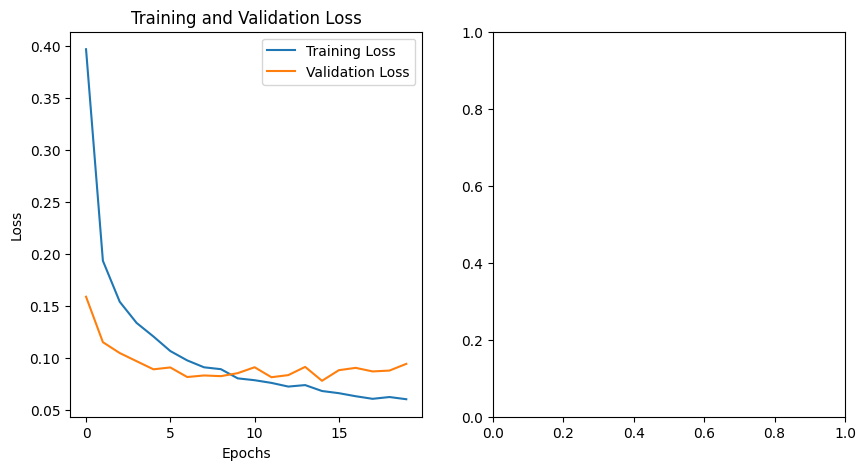

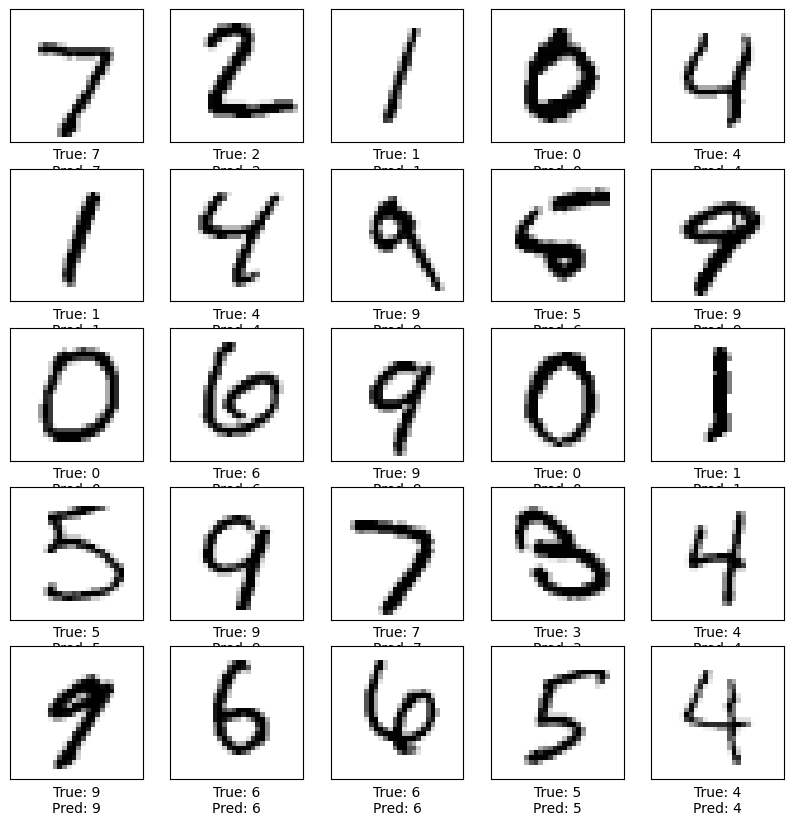

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to the range [0, 1]
X_train, X_test = X_train / 255.0, X_test / 255.0

# Build a deeper neural network model
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Define callbacks for early stopping and model checkpoint
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    keras.callbacks.ModelCheckpoint("mnist_model.h5", save_best_only=True),
]

# Train the model with more epochs
history = model.fit(X_train, y_train, epochs=20, validation_split=0.2, callbacks=callbacks)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test accuracy: {test_accuracy * 100:.2f}%")

# Make predictions
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Visualize training and validation loss over epochs
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

# Visualize some test samples and their predictions
plt.subplot(1, 2, 2)
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap=plt.cm.binary)
    plt.xlabel(f"True: {y_test[i]}\nPred: {predicted_labels[i]}")

plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import f1_score, recall_score

# Assuming 'y_test' contains the true labels and 'predicted_labels' contains predicted labels

# Calculate F1 score
f1 = f1_score(y_test, predicted_labels, average='weighted')
print("Weighted F1 Score:", f1)

# Calculate Recall (Sensitivity)
recall = recall_score(y_test, predicted_labels, average='weighted')
print("Weighted Recall:", recall)


Weighted F1 Score: 0.979001269647703
Weighted Recall: 0.979


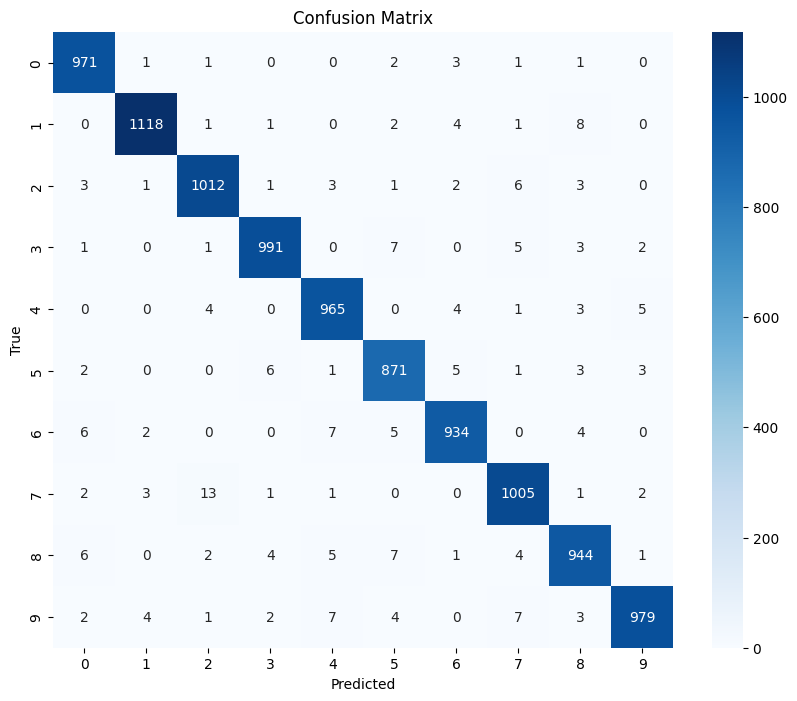

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'y_test' contains the true labels and 'predicted_labels' contains predicted labels

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, predicted_labels)

# Display the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:


# Print the training history (accuracy and loss for each epoch)
print("Training History:")
print(history.history)

# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test accuracy: {test_accuracy * 100:.2f}%")
print(f"Test loss: {test_loss:.4f}")


Training History:
{'loss': [0.39668065309524536, 0.1934451162815094, 0.15403921902179718, 0.1337551772594452, 0.12070608884096146, 0.10673832148313522, 0.09777776896953583, 0.09113414585590363, 0.08932729810476303, 0.0805044025182724, 0.07873036712408066, 0.07615137100219727, 0.07261443883180618, 0.07404307276010513, 0.06835535913705826, 0.06627596169710159, 0.06333616375923157, 0.060855068266391754, 0.06257154047489166, 0.060468267649412155], 'accuracy': [0.8804166913032532, 0.9411458373069763, 0.9537500143051147, 0.9599375128746033, 0.9630416631698608, 0.9674375057220459, 0.9703958630561829, 0.972000002861023, 0.973229169845581, 0.9758958220481873, 0.9756666421890259, 0.9762916564941406, 0.9778541922569275, 0.976937472820282, 0.9783958196640015, 0.979562520980835, 0.9804166555404663, 0.9808958172798157, 0.9812708497047424, 0.9810624718666077], 'val_loss': [0.1589239239692688, 0.11525584757328033, 0.10481584817171097, 0.09699384868144989, 0.08919143676757812, 0.09099506586790085, 0.08